Carregamento e pré-processamento de dados:
==========================================

In [4]:
# Importar pacotes e bibliotecas
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
#sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from joblib import dump
import warnings
warnings.filterwarnings('ignore')



In [5]:
# Load the Data Set
df = pd.read_excel("DadosCompressores_2018_valores.xlsx")

In [6]:
df.head()

,Data,23AI03.PNT,23AI04.PNT,23AI05.PNT,23FC22.MEAS,23FC61.MEAS,23FC80.MEAS,23II01.PNT,23LC19.MEAS,23LC20.MEAS,...,23VI06X.PNT,23VI06Y.PNT,23ZI01.PNT,23ZI02.PNT,23ZI02.PNT.1,23ZI02.PNT.2,23ZI01.PNT.1,23ZI02.PNT.3,23ZI03.PNT,23ZI04.PNT
0,2018-01-01 01:00:00,0.183762,0.164789,0.245109,50.543976,722.154602,999.747437,181.816833,52.821991,34.826756,...,30.432234,28.162088,0.259463,0.073871,0.073871,0.073871,0.259463,0.073871,0.161783,0.186203
1,2018-01-01 01:30:00,0.190031,0.164789,0.245109,50.575138,713.054321,1000.245544,180.946503,52.816032,35.066837,...,30.262323,28.097330,0.259463,0.073871,0.073871,0.073871,0.259463,0.073871,0.161783,0.186203
2,2018-01-01 02:00:00,0.190031,0.164789,0.245109,50.550999,718.224854,1000.586304,181.565201,52.808189,34.919464,...,30.656044,28.484615,0.249084,0.073871,0.073871,0.073871,0.249084,0.073871,0.161783,0.175824
3,2018-01-01 02:30:00,0.190031,0.164789,0.245109,50.587048,726.062012,1000.194885,181.300217,52.778400,34.559654,...,31.227106,28.571428,0.249084,0.073871,0.073871,0.073871,0.249084,0.073871,0.161783,0.175824
4,2018-01-01 03:00:00,0.190031,0.164789,0.245109,50.500458,714.996338,999.772949,179.135620,52.751953,35.018192,...,30.446520,27.793041,0.249084,0.073871,0.073871,0.073871,0.249084,0.073871,0.161783,0.175824


In [7]:
# Remover a coluna 'Data' para calcular calcular a matrix de correlação das variáveis
# df = df.drop(columns=['Data'])
df.head()

,Data,23AI03.PNT,23AI04.PNT,23AI05.PNT,23FC22.MEAS,23FC61.MEAS,23FC80.MEAS,23II01.PNT,23LC19.MEAS,23LC20.MEAS,...,23VI06X.PNT,23VI06Y.PNT,23ZI01.PNT,23ZI02.PNT,23ZI02.PNT.1,23ZI02.PNT.2,23ZI01.PNT.1,23ZI02.PNT.3,23ZI03.PNT,23ZI04.PNT
0,2018-01-01 01:00:00,0.183762,0.164789,0.245109,50.543976,722.154602,999.747437,181.816833,52.821991,34.826756,...,30.432234,28.162088,0.259463,0.073871,0.073871,0.073871,0.259463,0.073871,0.161783,0.186203
1,2018-01-01 01:30:00,0.190031,0.164789,0.245109,50.575138,713.054321,1000.245544,180.946503,52.816032,35.066837,...,30.262323,28.097330,0.259463,0.073871,0.073871,0.073871,0.259463,0.073871,0.161783,0.186203
2,2018-01-01 02:00:00,0.190031,0.164789,0.245109,50.550999,718.224854,1000.586304,181.565201,52.808189,34.919464,...,30.656044,28.484615,0.249084,0.073871,0.073871,0.073871,0.249084,0.073871,0.161783,0.175824
3,2018-01-01 02:30:00,0.190031,0.164789,0.245109,50.587048,726.062012,1000.194885,181.300217,52.778400,34.559654,...,31.227106,28.571428,0.249084,0.073871,0.073871,0.073871,0.249084,0.073871,0.161783,0.175824
4,2018-01-01 03:00:00,0.190031,0.164789,0.245109,50.500458,714.996338,999.772949,179.135620,52.751953,35.018192,...,30.446520,27.793041,0.249084,0.073871,0.073871,0.073871,0.249084,0.073871,0.161783,0.175824


In [8]:
# visualisations
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(30, 25)})

Text(0.5, 1.0, 'Correlation matrix')

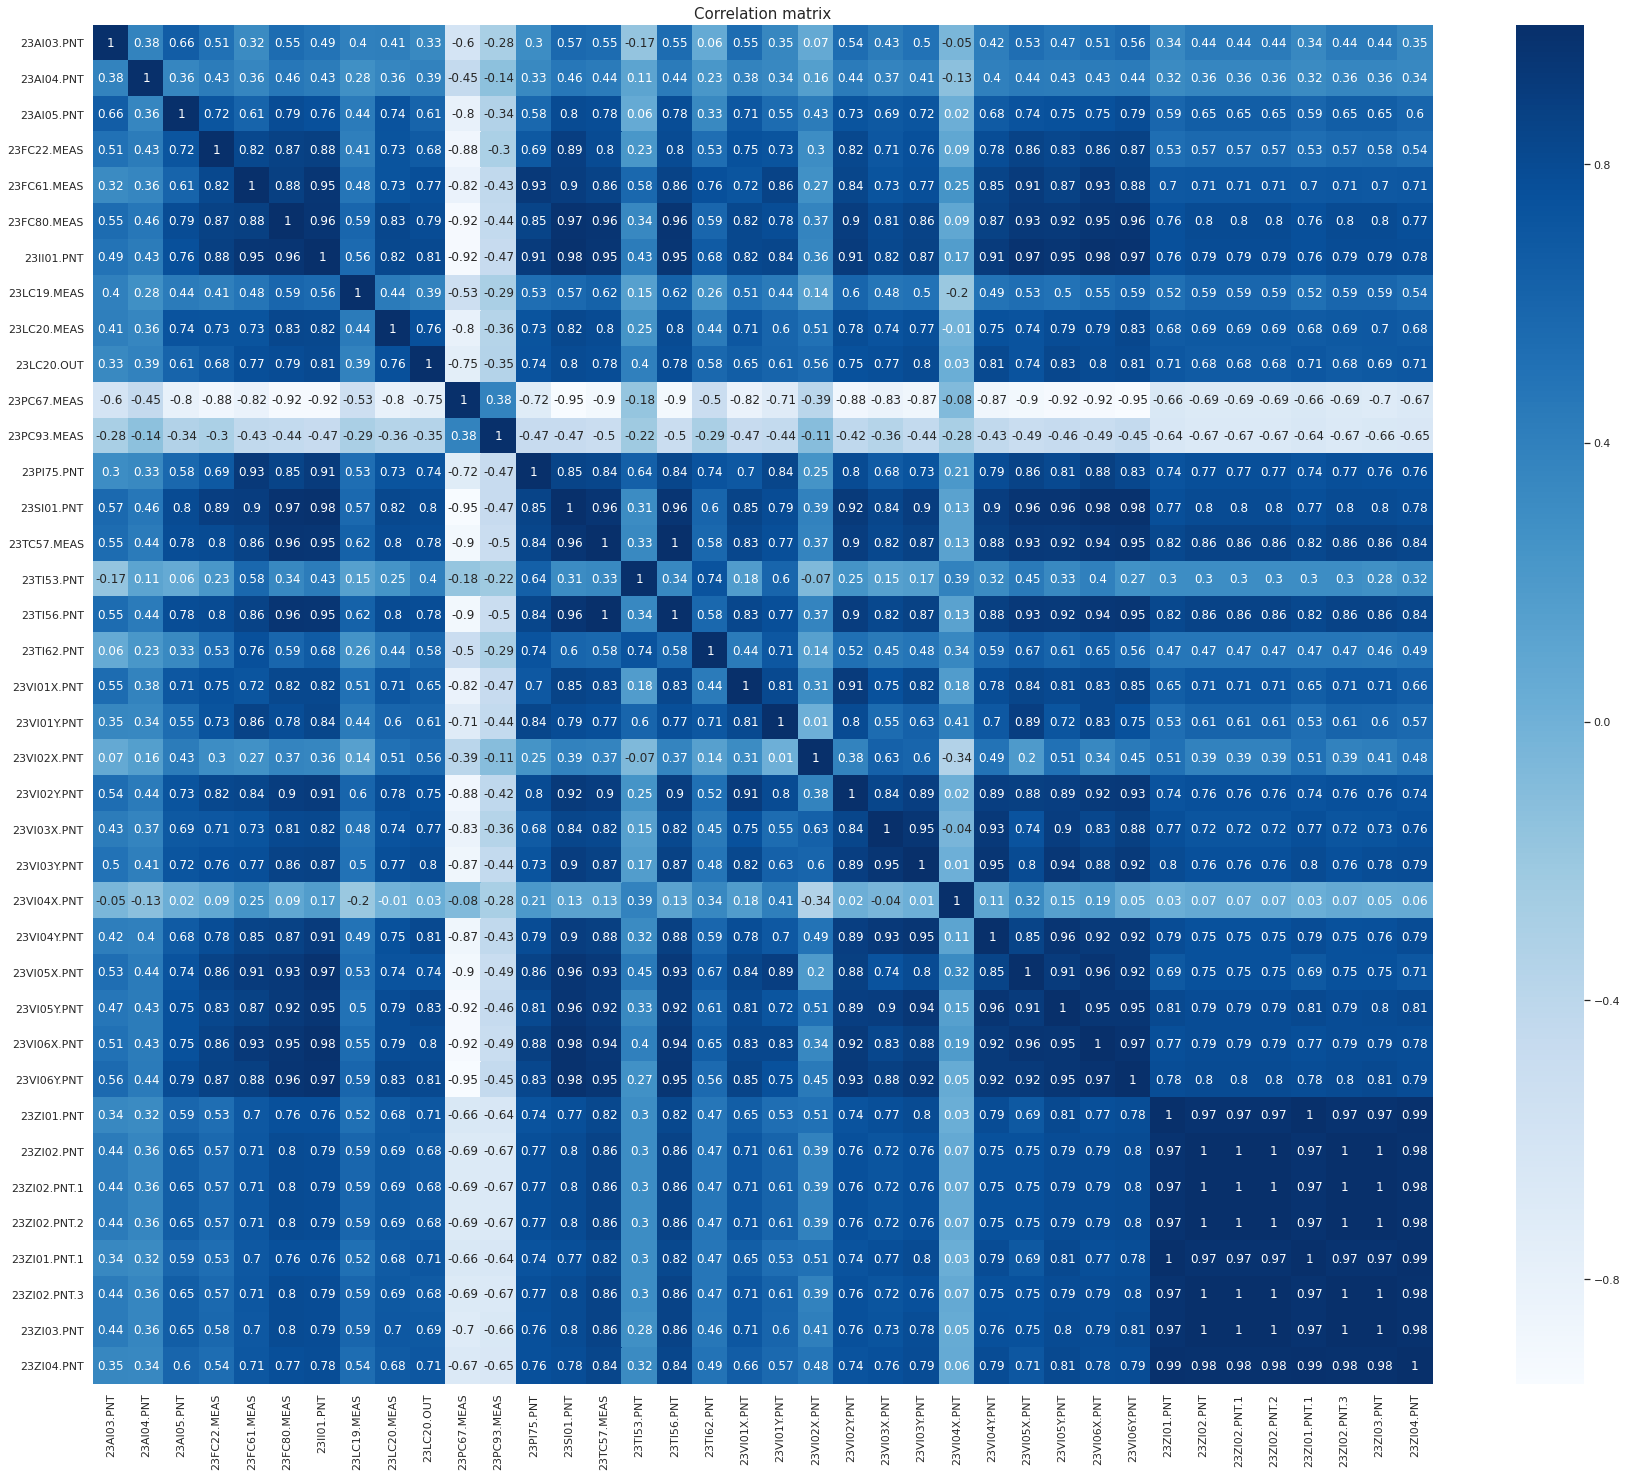

In [9]:

sns.heatmap(df.corr().round(2), cmap = 'Blues', annot = True).set_title('Correlation matrix', fontsize = 15)

In [10]:
# Remover todas variáveis com "correlação = 1" pois são instrumentos redundantes
df = df.drop(columns=['23ZI02.PNT.1', '23ZI02.PNT.2','23ZI02.PNT.3','23TI62.PNT','23VI04X.PNT','23ZI02.PNT','23ZI01.PNT.1','23TI56.PNT'])

Text(0.5, 1.0, 'Correlation matrix')

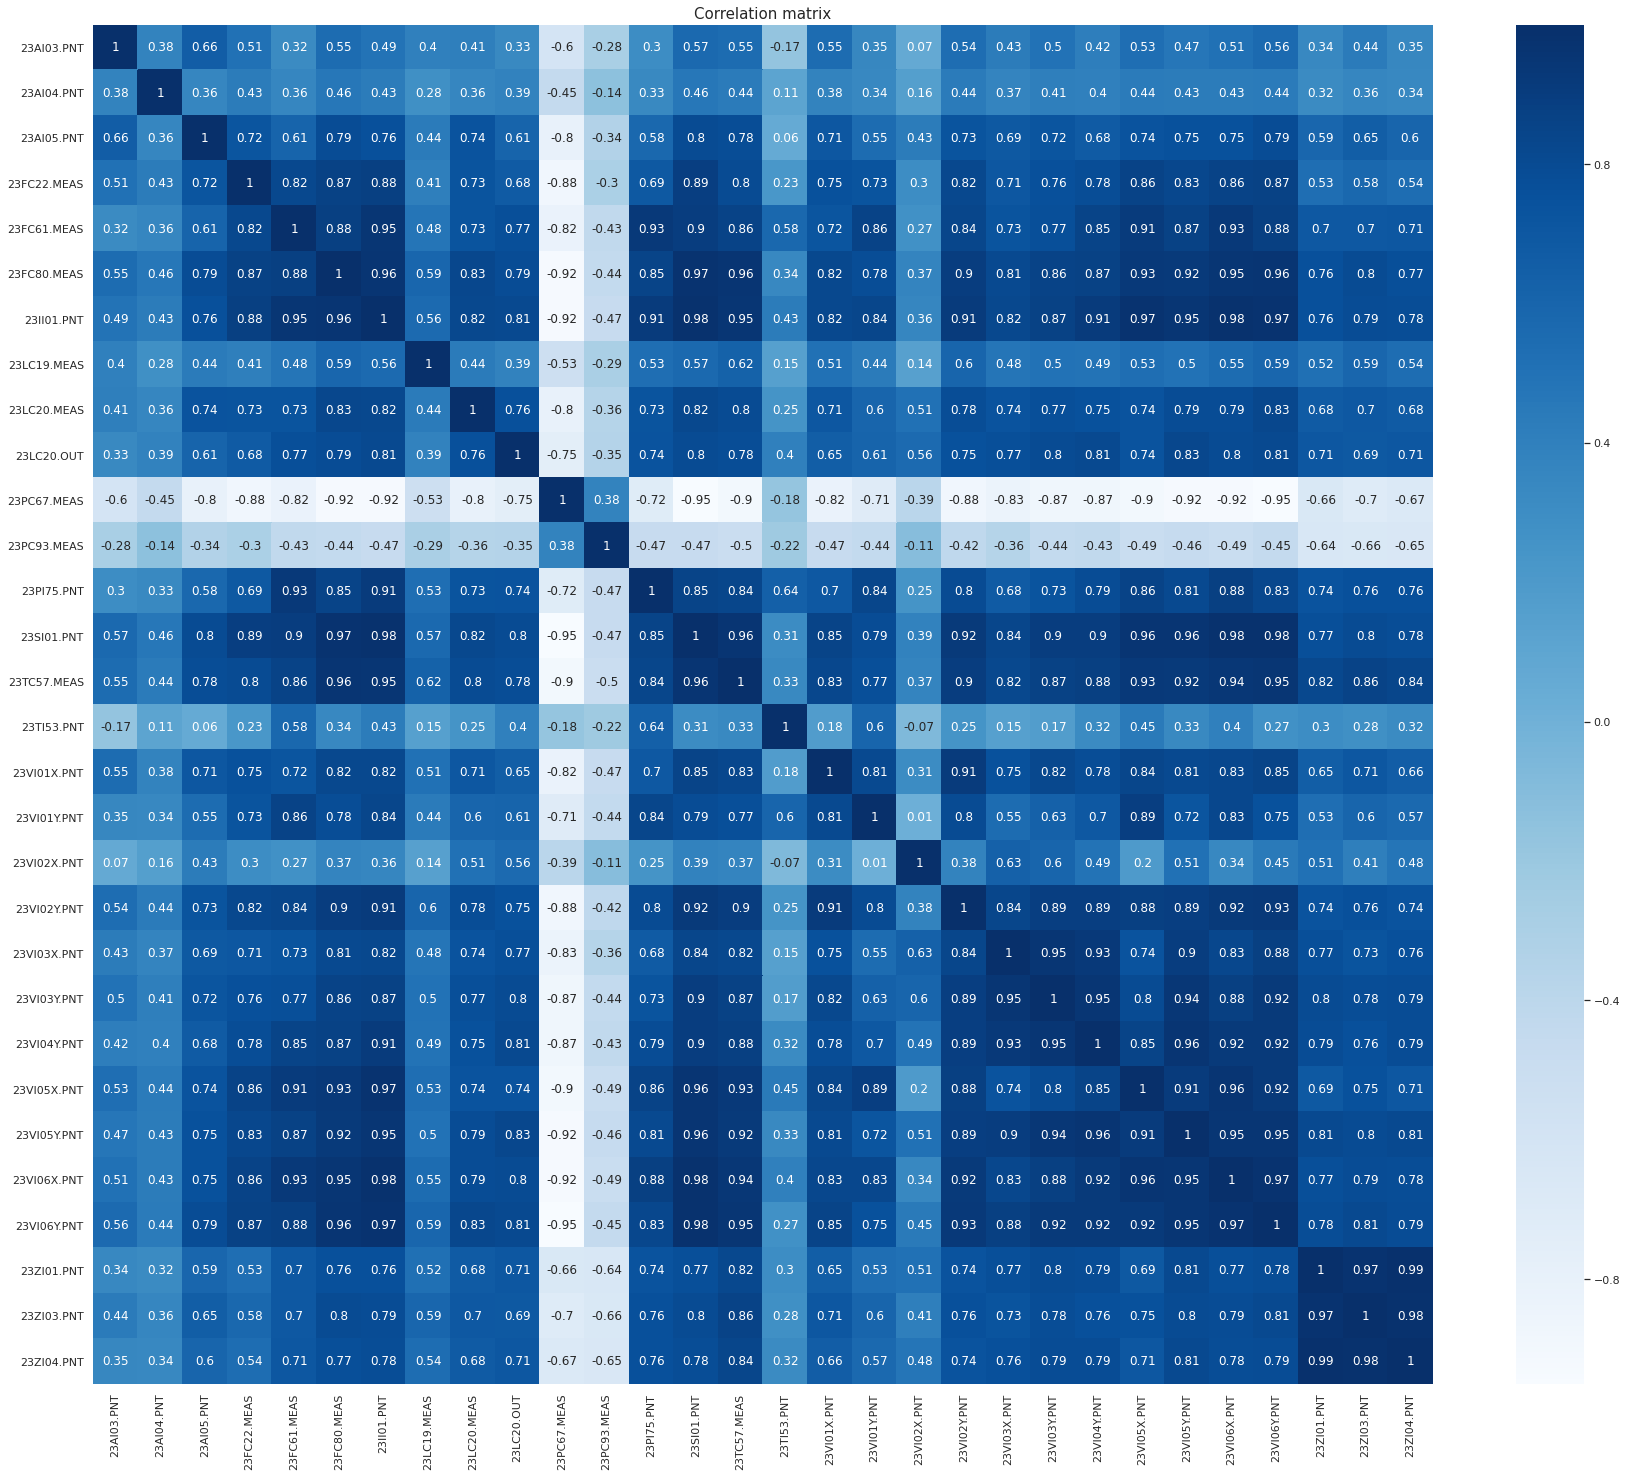

In [11]:
# Exibir novamente as correlações. 
sns.heatmap(df.corr().round(2), cmap = 'Blues', annot = True).set_title('Correlation matrix', fontsize = 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 31 columns):
Data           17521 non-null datetime64[ns]
23AI03.PNT     17505 non-null float64
23AI04.PNT     17505 non-null float64
23AI05.PNT     17505 non-null float64
23FC22.MEAS    17505 non-null float64
23FC61.MEAS    17505 non-null float64
23FC80.MEAS    17505 non-null float64
23II01.PNT     17465 non-null float64
23LC19.MEAS    17505 non-null float64
23LC20.MEAS    17499 non-null float64
23LC20.OUT     17465 non-null float64
23PC67.MEAS    17465 non-null float64
23PC93.MEAS    17505 non-null float64
23PI75.PNT     17465 non-null float64
23SI01.PNT     17505 non-null float64
23TC57.MEAS    17505 non-null float64
23TI53.PNT     17505 non-null float64
23VI01X.PNT    17506 non-null float64
23VI01Y.PNT    17506 non-null float64
23VI02X.PNT    17506 non-null float64
23VI02Y.PNT    17506 non-null float64
23VI03X.PNT    17506 non-null float64
23VI03Y.PNT    17506 non-null float64
23VI04Y.PN

In [13]:
df.isna().sum()

Data            0
23AI03.PNT     16
23AI04.PNT     16
23AI05.PNT     16
23FC22.MEAS    16
23FC61.MEAS    16
23FC80.MEAS    16
23II01.PNT     56
23LC19.MEAS    16
23LC20.MEAS    22
23LC20.OUT     56
23PC67.MEAS    56
23PC93.MEAS    16
23PI75.PNT     56
23SI01.PNT     16
23TC57.MEAS    16
23TI53.PNT     16
23VI01X.PNT    15
23VI01Y.PNT    15
23VI02X.PNT    15
23VI02Y.PNT    15
23VI03X.PNT    15
23VI03Y.PNT    15
23VI04Y.PNT    15
23VI05X.PNT    15
23VI05Y.PNT    15
23VI06X.PNT    15
23VI06Y.PNT    15
23ZI01.PNT     15
23ZI03.PNT     15
23ZI04.PNT     15
dtype: int64

In [14]:
# Substituindo valores faltantes com a média
df = df.fillna(df.mean())

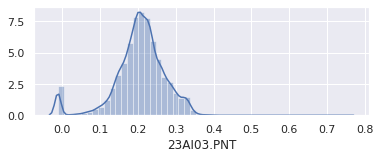

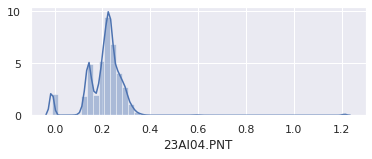

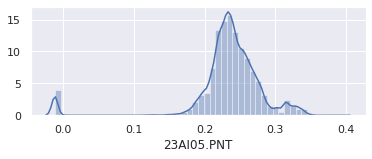

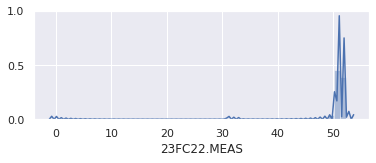

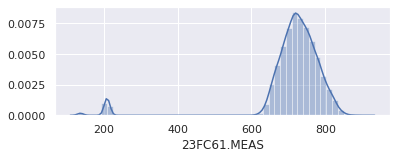

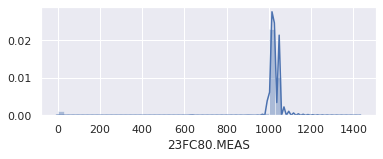

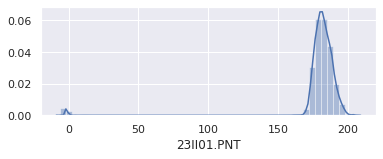

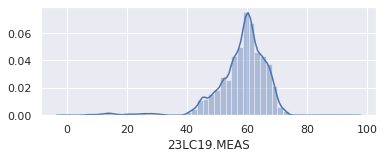

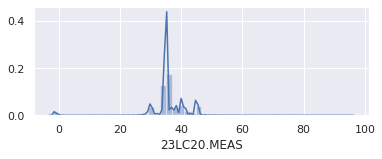

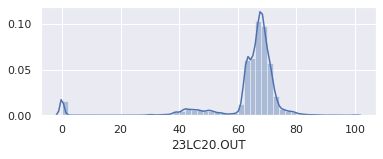

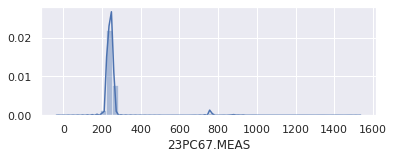

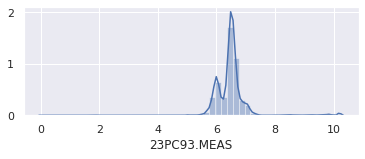

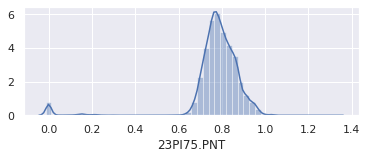

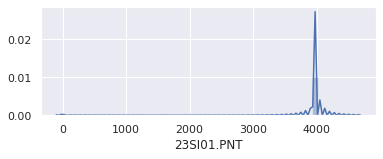

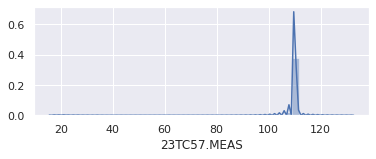

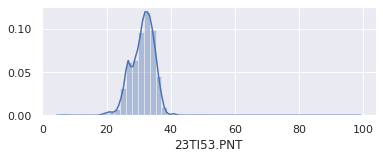

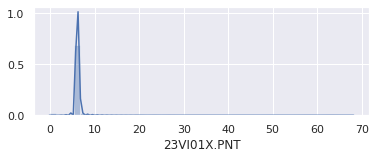

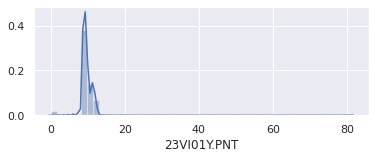

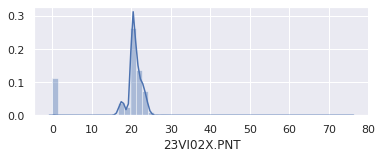

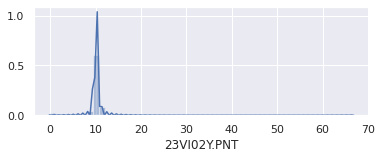

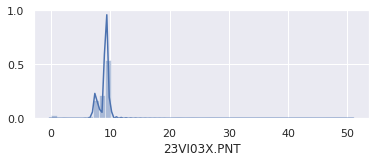

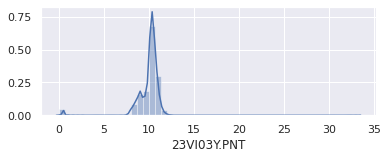

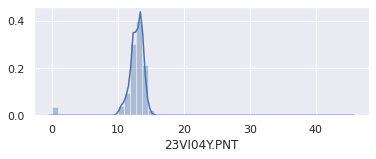

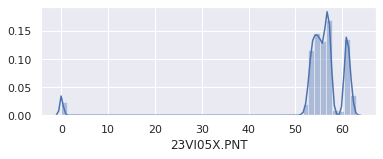

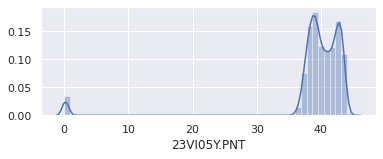

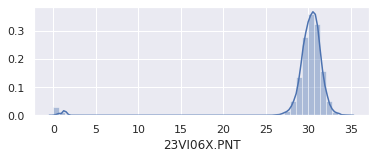

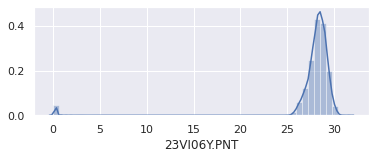

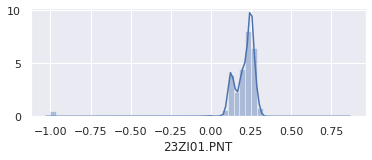

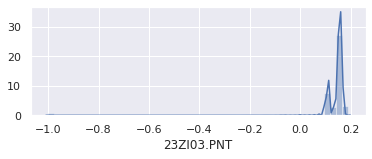

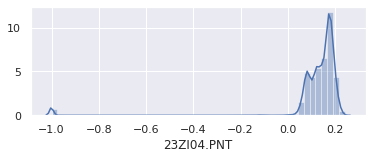

In [16]:
df_hist = df.drop('Data',1)

plt.rcParams['figure.figsize'] = [6, 2]
for column in df_hist.columns:
    plt.figure()
    sns.distplot(df_hist[column])

In [17]:
df1=df

In [18]:
df = df.drop('Data', 1) 

In [19]:
df.index = pd.to_datetime(df1['Data'], format='%Y.%m.%d.%H.%M.%S')

In [20]:
df.head()

,23AI03.PNT,23AI04.PNT,23AI05.PNT,23FC22.MEAS,23FC61.MEAS,23FC80.MEAS,23II01.PNT,23LC19.MEAS,23LC20.MEAS,23LC20.OUT,...,23VI03X.PNT,23VI03Y.PNT,23VI04Y.PNT,23VI05X.PNT,23VI05Y.PNT,23VI06X.PNT,23VI06Y.PNT,23ZI01.PNT,23ZI03.PNT,23ZI04.PNT
Data,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,0.183762,0.164789,0.245109,50.543976,722.154602,999.747437,181.816833,52.821991,34.826756,68.574005,...,9.249084,10.347986,13.644689,57.142857,43.123398,30.432234,28.162088,0.259463,0.161783,0.186203
2018-01-01 01:30:00,0.190031,0.164789,0.245109,50.575138,713.054321,1000.245544,180.946503,52.816032,35.066837,68.521942,...,9.249084,10.073260,13.461538,57.509159,43.282928,30.262323,28.097330,0.259463,0.161783,0.186203
2018-01-01 02:00:00,0.190031,0.164789,0.245109,50.550999,718.224854,1000.586304,181.565201,52.808189,34.919464,68.343872,...,9.294872,10.531136,13.873627,56.776558,43.550549,30.656044,28.484615,0.249084,0.161783,0.175824
2018-01-01 02:30:00,0.190031,0.164789,0.245109,50.587048,726.062012,1000.194885,181.300217,52.778400,34.559654,68.315620,...,9.111722,10.485349,13.919415,57.234432,43.269230,31.227106,28.571428,0.249084,0.161783,0.175824
2018-01-01 03:00:00,0.190031,0.164789,0.245109,50.500458,714.996338,999.772949,179.135620,52.751953,35.018192,68.441750,...,9.432235,10.439561,13.324176,57.600735,43.326283,30.446520,27.793041,0.249084,0.161783,0.175824


In [21]:
df.describe()

,23AI03.PNT,23AI04.PNT,23AI05.PNT,23FC22.MEAS,23FC61.MEAS,23FC80.MEAS,23II01.PNT,23LC19.MEAS,23LC20.MEAS,23LC20.OUT,...,23VI03X.PNT,23VI03Y.PNT,23VI04Y.PNT,23VI05X.PNT,23VI05Y.PNT,23VI06X.PNT,23VI06Y.PNT,23ZI01.PNT,23ZI03.PNT,23ZI04.PNT
count,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,...,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000
mean,0.204825,0.209982,0.234364,50.439104,713.793880,993.810996,176.953462,58.151768,35.279196,63.489376,...,8.673619,9.788037,12.446529,55.009367,39.228714,29.427280,27.423389,0.190076,0.124322,0.123472
std,0.067379,0.086216,0.054430,4.796914,101.626695,175.740442,32.859024,8.817506,7.686871,13.712754,...,1.770577,1.885617,2.422172,10.155062,7.210857,5.255004,4.935426,0.171056,0.155333,0.158835
min,-0.012000,-0.012000,-0.012000,-0.860449,131.067108,-0.475309,-6.060000,-0.595619,-2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,0.174794,0.174961,0.220430,50.889904,694.339600,1019.388733,178.100388,54.863976,34.785332,63.550983,...,8.553892,9.661173,12.179487,54.395607,38.644691,29.578754,27.680220,0.169109,0.133089,0.107448
50%,0.208359,0.221062,0.236977,51.049599,726.248291,1020.157043,181.994644,59.627003,35.115215,67.053917,...,9.203298,10.235761,12.888279,56.272896,40.165386,30.333334,28.342491,0.228938,0.153236,0.155067
75%,0.242526,0.247758,0.258047,51.927967,760.085632,1039.807861,186.447479,63.438282,37.986996,69.293114,...,9.432235,10.576237,13.507326,57.690109,42.307693,31.023903,28.891941,0.253358,0.160562,0.178266
max,0.747825,1.212000,0.393469,53.291729,911.687927,1427.996094,206.584045,94.905113,95.276283,100.000000,...,50.762638,33.187729,45.283882,62.866302,44.963371,34.844322,31.684982,0.841880,0.189866,0.239927


In [22]:
data = df.to_excel("Data.xlsx", sheet_name = "Data")